In [1]:
# lets make a new nn
import pandas as pd
import torch
import random
import math
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image as I
import torch.optim as optim
import torch.nn.functional as F

c:\Users\SOUMIL\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
data = np.array(pd.read_csv('Mnist/digit-recognizer/train.csv'))
print(data.shape)
data = torch.tensor(data)

(42000, 785)


In [73]:
y = data[:,0]
x = data[:,1:]/255

In [6]:
xtrain = x[:int(0.8*len(x))]
ytrain = y[:int(0.8*len(y))]
xtest = x[int(0.8*len(x)):]
ytest = y[int(0.8*len(y)):]

In [7]:
bat_sz = 16
n_fl = 100
n_ol = 10

In [8]:
ix = (torch.randperm(len(xtrain)-bat_sz))
print(max(ix))
print(len(xtrain))

tensor(33583)
33600


In [9]:
w1 = torch.tensor(torch.randn((784,n_fl))*0.1).clone().detach().requires_grad_(True)
b1 = torch.tensor(torch.randn((bat_sz,n_fl))*0.01).clone().detach().requires_grad_(True)
w2 = torch.tensor(torch.randn((n_fl,n_ol)) * 0.1).clone().detach().requires_grad_(True)
b2 = torch.tensor(torch.randn((bat_sz,n_ol)) * 0.01).clone().detach().requires_grad_(True)

C:\Users\SOUMIL\AppData\Local\Temp\ipykernel_11428\1232626240.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  w1 = torch.tensor(torch.randn((784,n_fl))*0.1).clone().detach().requires_grad_(True)
C:\Users\SOUMIL\AppData\Local\Temp\ipykernel_11428\1232626240.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  b1 = torch.tensor(torch.randn((bat_sz,n_fl))*0.01).clone().detach().requires_grad_(True)
C:\Users\SOUMIL\AppData\Local\Temp\ipykernel_11428\1232626240.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  w2 = torch.tensor(torch.rand

In [10]:
parame = [w1,b1,w2,b2]
a=w1

In [11]:
optimizer = torch.optim.SGD([w1, b1, w2, b2], lr=0.01)

In [ ]:
lossi = []

In [77]:
convolution = torch.tensor([[1,0,-1],[2,0,-2],[1,0,-1]]) 

In [57]:
# convolution apply function
def coonv(arrey,conv):
    img = arrey.view([28,28]).tolist()

    # padding ---
    img.insert(0,torch.zeros([28]).tolist())
    img.append(torch.zeros([28]).tolist())
    for i in range(len(img)):
        img[i].insert(0,0.0)
        img[i].append(0.0)
    # done
    # plt.gray()
    # plt.imshow(img, interpolation='nearest')
    # plt.show()
    # -----------
    #conv = torch.tensor([[1,1,1],[0,0,0],[-1,-1,-1]])    # horizontal
    #    # verticle
    #conv = torch.tensor([[1,0,-1],[2,0,-2],[1,0,-1]])
    # resulting arr = 28 -3 +1   ie 26x26
    def applyconv():
        restn = torch.zeros([28,28])
        for i in range(len(img)-2):
            for j in range(len(img)-2):
                a = torch.tensor(img[i:i+2][j:j+2])
                # print(a*conv,sum(sum(a*conv)))
                # return
                restn[i][j] = max(sum(sum(a*conv)),0)
                
        return restn
    arl = applyconv()
    return arl

def show(paramo,conv):
    agh = coonv(paramo,conv)
    plt.gray()
    plt.imshow(paramo.view([28,28]).tolist(), interpolation='nearest')
    plt.show()
    plt.gray()
    plt.imshow(agh.tolist(), interpolation='nearest')
    plt.show()


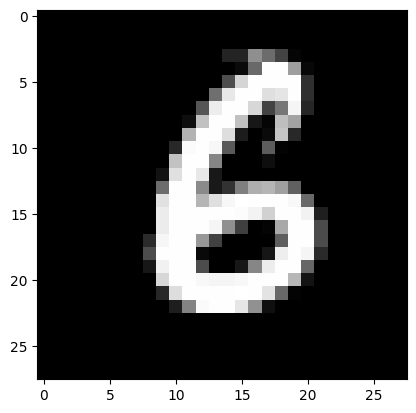

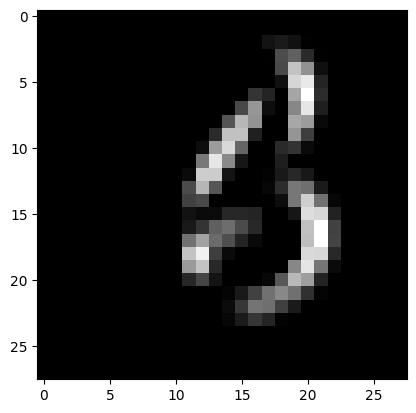

In [78]:
show(x[3344],convolution)
# agh = coonv(x[5],convolution)

In [75]:
print(x.shape)

torch.Size([42000, 784])


In [ ]:
# dataset formation
nx = torch.zeros([42000, 784])
for i in range(len(x)):
    nx[i] = coonv(x[i],convolution).view([784])
    print(i/len(x))
# will take 3 days 

In [70]:
print(len(x))

42000


In [71]:
nx=0
ny=0

In [ ]:
# check
plt.gray()
plt.imshow(nx[2].view([28,28]).tolist(), interpolation='nearest')
plt.show()
plt.gray()
plt.imshow(x[2].view([28,28]).tolist(), interpolation='nearest')
plt.show()

In [12]:
for _ in range(10):
    for i in ix:
        result = [x[j] for j in range(i, i+16)]
        xt = torch.cat(result)
        yt = torch.tensor(y[i:i+15])
        X_train = xt.view([bat_sz,784])
        Y_train = F.one_hot(yt,10).float()

        # forward pass
        z1 = X_train @ w1 + b1   # bat_sz, n_fl
        a1 = torch.sigmoid(z1)   #   ^
        z2 = a1 @ w2 + b2        # bat_sz, n_ol
        t = z2
        # t is the activations of the output layer (10 activations for all 4 training examples) 
        loss = F.cross_entropy(t,Y_train)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    print(_ ," iteration complete")
    print("loss =",loss.item())
    optimizer = torch.optim.SGD([w1, b1, w2, b2], lr=0.001)
    

    

0  iteration complete
loss = 0.1549929976463318
1  iteration complete
loss = 0.14529283344745636
2  iteration complete
loss = 0.14359790086746216
3  iteration complete
loss = 0.14252141118049622
4  iteration complete
loss = 0.14196962118148804
5  iteration complete
loss = 0.14188070595264435
6  iteration complete
loss = 0.1421775370836258
7  iteration complete
loss = 0.14278125762939453
8  iteration complete
loss = 0.1436130255460739
9  iteration complete
loss = 0.14459867775440216


In [13]:
def forward(ex,W1,B1,W2,B2):
    z1 = ex.float() @ W1 + B1
    a1 = torch.sigmoid(z1)
    z2 = a1 @ W2 + B2
    a2 = torch.softmax(z2, dim=1)
    out = a2
    return out

In [14]:
data2 = np.array(pd.read_csv('Mnist/digit-recognizer/test.csv'))
print(data2.shape)
data2 = torch.tensor(data2)

(28000, 784)


In [30]:
label = torch.tensor(np.array(data2))

In [42]:
arr = []
for e in range(len(data2)):
    # result = [data2[j] for j in range(e, e+16)]
    # xt = torch.cat(result)
    oot =list((forward(data2[e],w1,b1,w2,b2))[0])
    arr.append(oot.index(max(oot)))

In [43]:
df = pd.DataFrame({'Numbers': arr})
# Write the DataFrame to a CSV file
df.to_csv('Numbers.csv', index=True, header=False)

In [29]:
def arrt():
    def rrt():
        return 1 
    a = rrt()
    return a+2
print(arrt())

3
